In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [4]:
data = pd.read_csv("V:/VikasSharma/DataCamp/AV/HR Analytics/train_LZdllcl.csv")

In [6]:
data.head(3)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0


In [7]:
data.shape

(54808, 14)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [35]:
data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


The above stats summarizes the data. We can see that most of the people have done 1 training and the highest value being 10, similarly there is one record where the length of service is 37 years it would be interesting to see if this is by chance or a real value as it might influence our analysis. Before that let's have a look at the categorical variables as well.

In [8]:
# We would use describe method again but this to get a summary of non numerical variables
data.describe(include = "object")

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


Looking at the above table we know that department has 9 different categories, region has 34, education 3 and recruitment channel has 3 categories. The info however doesn't give us much detais about the contents of these variables, to get more insights we would use value_counts function.

In [9]:
data["department"].value_counts(normalize= True, dropna = False)

Sales & Marketing    0.307254
Operations           0.207050
Procurement          0.130236
Technology           0.130236
Analytics            0.097650
Finance              0.046271
HR                   0.044118
Legal                0.018957
R&D                  0.018227
Name: department, dtype: float64

In [10]:
data["region"].value_counts(normalize= True, dropna = False) 

region_2     0.225204
region_22    0.117282
region_7     0.088363
region_15    0.051233
region_13    0.048314
region_26    0.041235
region_31    0.035305
region_4     0.031072
region_27    0.030269
region_16    0.026730
region_28    0.024048
region_11    0.023993
region_23    0.021438
region_29    0.018136
region_32    0.017242
region_19    0.015947
region_20    0.015509
region_14    0.015089
region_25    0.014943
region_17    0.014523
region_5     0.013976
region_6     0.012589
region_30    0.011987
region_8     0.011951
region_10    0.011823
region_1     0.011130
region_24    0.009269
region_12    0.009123
region_9     0.007663
region_21    0.007499
region_3     0.006313
region_34    0.005328
region_33    0.004908
region_18    0.000566
Name: region, dtype: float64

In [38]:
 data["education"].value_counts(normalize= True, dropna = False)

Bachelor's          0.669045
Master's & above    0.272314
NaN                 0.043953
Below Secondary     0.014688
Name: education, dtype: float64

In [39]:
 data["gender"].value_counts(normalize= True, dropna = False)

m    0.702379
f    0.297621
Name: gender, dtype: float64

In [11]:
 data["recruitment_channel"].value_counts(normalize= True, dropna = False)

other       0.555503
sourcing    0.423661
referred    0.020836
Name: recruitment_channel, dtype: float64

In [12]:
# Also the is-promoted is numeric in nature but we need to make it categorical 
data.is_promoted = data.is_promoted.astype("object")

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  object 
dtypes: float64(1), int64(7), object(6)
memory usage: 5.9+ MB


In [14]:
data.is_promoted.value_counts(normalize=True)

0    0.91483
1    0.08517
Name: is_promoted, dtype: float64

The most of inportant part of any analysis is to be able to slice and dice the data table, so in the below section I just introduced the procedure of that which is pretty straightforward.

In [15]:
# slicing the data by column name
data.loc[0:20, "department":"gender"] # method 1 using loc

,department,region,education,gender
0,Sales & Marketing,region_7,Master's & above,f
1,Operations,region_22,Bachelor's,m
2,Sales & Marketing,region_19,Bachelor's,m
3,Sales & Marketing,region_23,Bachelor's,m
4,Technology,region_26,Bachelor's,m
5,Analytics,region_2,Bachelor's,m
6,Operations,region_20,Bachelor's,f
7,Operations,region_34,Master's & above,m
8,Analytics,region_20,Bachelor's,m
9,Sales & Marketing,region_1,Master's & above,m


In [16]:
data[0:20][["department","region","education","gender"]] # method 2 usinng just the basic stuff

,department,region,education,gender
0,Sales & Marketing,region_7,Master's & above,f
1,Operations,region_22,Bachelor's,m
2,Sales & Marketing,region_19,Bachelor's,m
3,Sales & Marketing,region_23,Bachelor's,m
4,Technology,region_26,Bachelor's,m
5,Analytics,region_2,Bachelor's,m
6,Operations,region_20,Bachelor's,f
7,Operations,region_34,Master's & above,m
8,Analytics,region_20,Bachelor's,m
9,Sales & Marketing,region_1,Master's & above,m


In [17]:
data[data.is_promoted == 0][0:20][["department","region","education","gender","is_promoted"]] # applying multiple filters all at once

,department,region,education,gender,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,0
1,Operations,region_22,Bachelor's,m,0
2,Sales & Marketing,region_19,Bachelor's,m,0
3,Sales & Marketing,region_23,Bachelor's,m,0
4,Technology,region_26,Bachelor's,m,0
5,Analytics,region_2,Bachelor's,m,0
6,Operations,region_20,Bachelor's,f,0
7,Operations,region_34,Master's & above,m,0
8,Analytics,region_20,Bachelor's,m,0
9,Sales & Marketing,region_1,Master's & above,m,0


In [18]:
# We can also replace some values of a column in pandas.
data.loc[data.gender == "f", "gender"] = "female"
#data.gender.head()
# However if you want to all the values in you can use map
data.gender = data.gender.map({"female":"Female","m":"Male"})
data.gender.head()

0    Female
1      Male
2      Male
3      Male
4      Male
Name: gender, dtype: object

Now we would begin our journey and would do some fixes on the dataset like capping the outliers, treating missing values etc

In [19]:
data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000


In [52]:
# let's have a look at people with 10 trainings
data.loc[data.no_of_trainings == 10, "no_of_trainings"]
# so there are 5 observations where the no of trainings is 10

6207     10
30936    10
32870    10
34496    10
44897    10
Name: no_of_trainings, dtype: int64

In [54]:
data.loc[data.length_of_service == 37, "length_of_service" ] # there is just one such value where the length of service is 37

31071    37
Name: length_of_service, dtype: int64

In [57]:
# looking at the missing value
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  object 
dtypes: float64(1), int64(7), object(6)
memory usage: 5.9+ MB


In [20]:
# here we can see that education has 5% missing values and previous yr rating has 10% missing values. Let's replace these values
data[["education_ind"]] = data[["education"]].isnull() # As first step we create a missing indicator variable
data.education = data.education.fillna("Missing") # next we replace the Nan with missing as a value

In [21]:
 data.previous_year_rating = data.previous_year_rating.fillna(data.previous_year_rating.mean()) # repalcing the nan by avg

In [22]:
data.loc[ (data.previous_year_rating >3 ) & (data.previous_year_rating <4) , "previous_year_rating"] 

10       3.329256
23       3.329256
29       3.329256
56       3.329256
58       3.329256
           ...   
54703    3.329256
54734    3.329256
54746    3.329256
54773    3.329256
54801    3.329256
Name: previous_year_rating, Length: 4124, dtype: float64

In [23]:
data["previous_year_rating_ind"] =  np.where((data.previous_year_rating >3 ) & (data.previous_year_rating <4), 1, 0)

In [24]:
data["previous_year_rating_ind"].value_counts() # check to see if the imputataion is good

0    50684
1     4124
Name: previous_year_rating_ind, dtype: int64

# We will look into some EDA next
 

Let's have a look at the proportion of the people who got promoted department wise

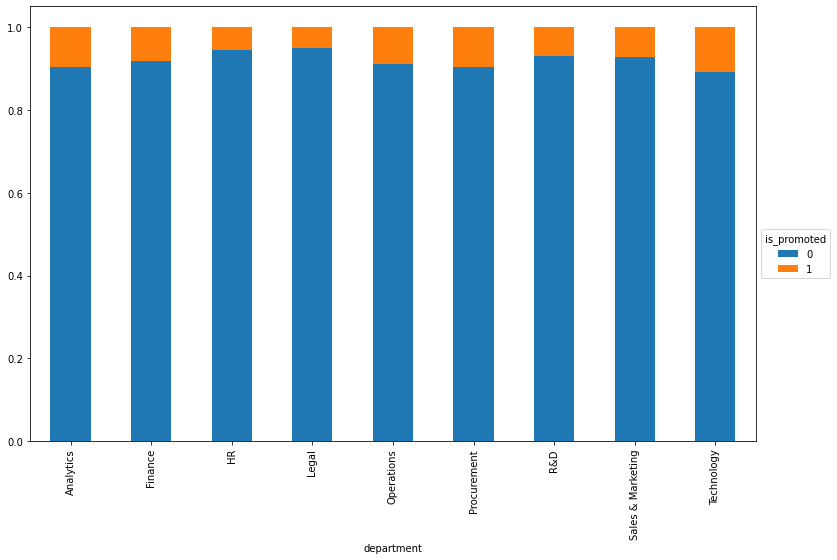

In [38]:
ct = pd.crosstab(data.department, data.is_promoted, normalize='index') # using index to get a 100% ratio per category
plt.rcParams['figure.figsize'] = [13,8] # to change the chart size
ct.plot.bar(stacked = True) # here we created a stack chart to see the promotion ration per category
plt.legend(title='is_promoted',bbox_to_anchor=(1,0.5))

Next we replicate the same procedure but this time for the regions

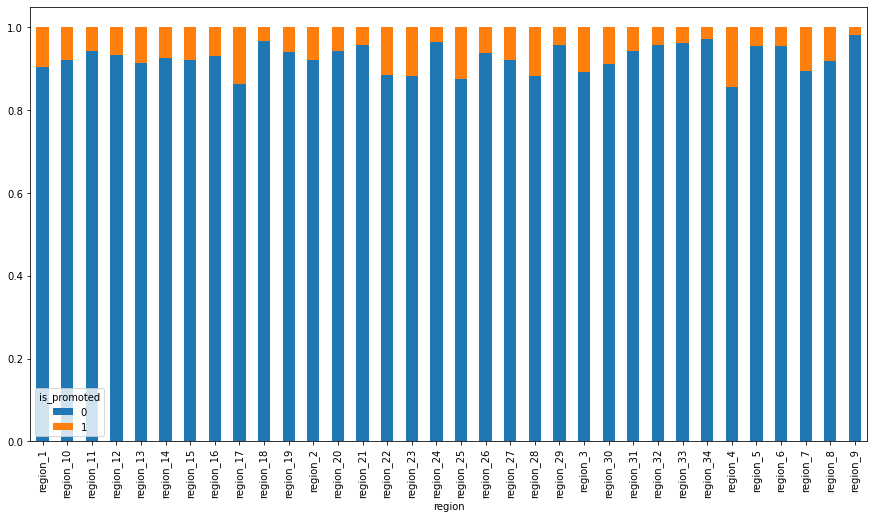

In [44]:
ct2 = pd.crosstab(data.region, data.is_promoted, normalize="index")
plt.rcParams['figure.figsize'] = [15,8]
ct2.plot.bar(stacked = True)

we can see the some regions have a relatively higher % of promotions like region 17,22,23,25,28,3,4 and 7

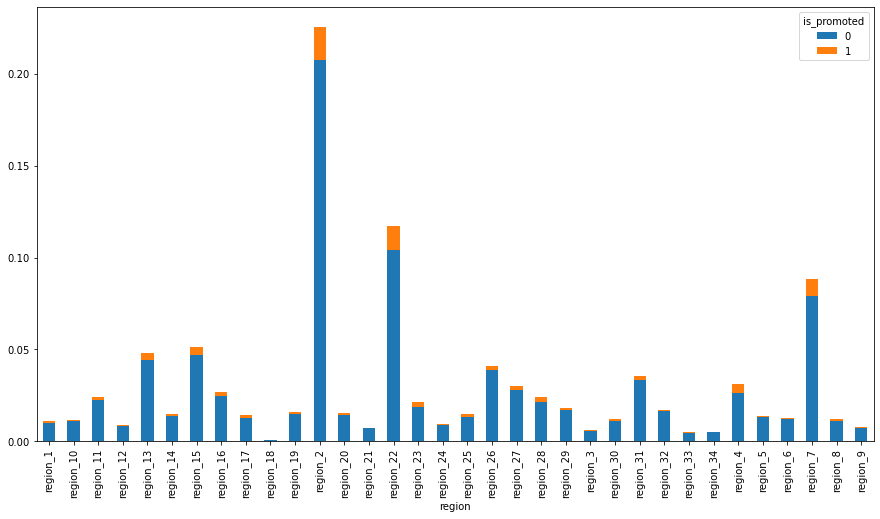

In [49]:
pd.crosstab(data.region, data.is_promoted, normalize=True).plot.bar(stacked = True)


Here we see that region 2, region 22 and region 7 are the most frequent regions and therefore record the highest share of promotions

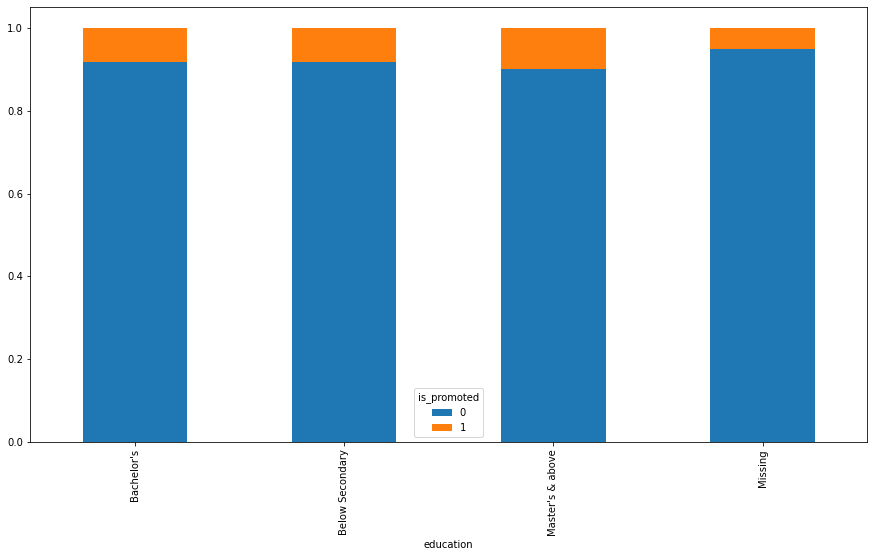

In [50]:
# Let's have a look the distribution of promotion at education level
pd.crosstab(data.education,data.is_promoted, normalize = "index").plot.bar(stacked = True)
# IN the chart we see that there is no major signicance of your education on promotion however  missing values
# have a relatively level of promotion share 

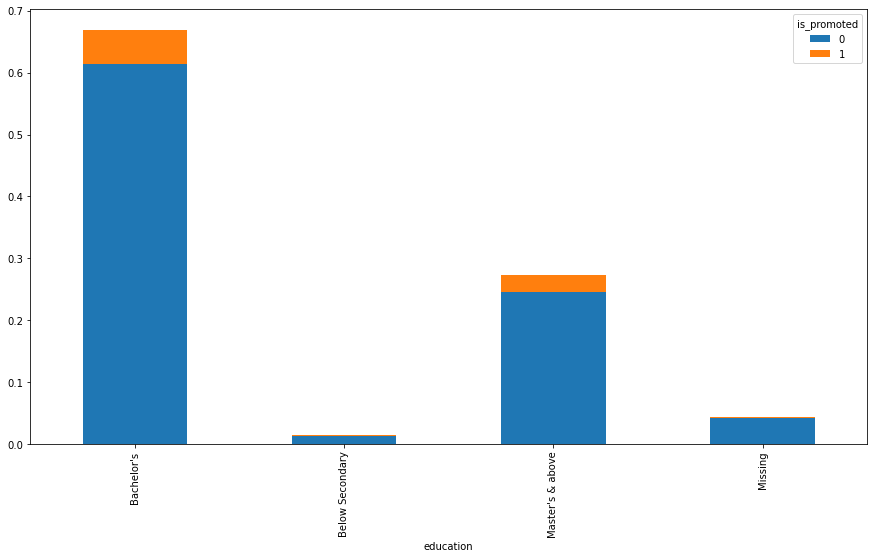

In [52]:
# next we look at the distrbution of education
pd.crosstab(data.education, data.is_promoted, normalize = True).plot.bar(stacked = True)
# We can see that most of the section of the population has bachelor's as their education followed 25% who have master's degree


##              Next we divide the data in test and train for developing our model

In [67]:
data_indep =  data.drop("is_promoted",1) #removing the target variable from the data
data_Y = data["is_promoted"] #  extracting target

data_indep_1 = pd.get_dummies(data_indep)
data_indep_1.shape


(54808, 62)

In [64]:
# Next we create the partition of train test 
X_train, X_test, Y_train,Y_test = train_test_split(data_indep_1, data_Y, test_size = 0.3, random_state = 0 )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38365 entries, 50994 to 2732
Data columns (total 62 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   employee_id                   38365 non-null  int64  
 1   no_of_trainings               38365 non-null  int64  
 2   age                           38365 non-null  int64  
 3   previous_year_rating          38365 non-null  float64
 4   length_of_service             38365 non-null  int64  
 5   KPIs_met >80%                 38365 non-null  int64  
 6   awards_won?                   38365 non-null  int64  
 7   avg_training_score            38365 non-null  int64  
 8   education_ind                 38365 non-null  bool   
 9   previous_year_rating_ind      38365 non-null  int32  
 10  department_Analytics          38365 non-null  uint8  
 11  department_Finance            38365 non-null  uint8  
 12  department_HR                 38365 non-null  uint8  
 13